objective 3

In [3]:
import pandas as pd
df = pd.read_csv('data1.csv')
df.index=range(1,212)
df

,GeoAreaName,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Afghanistan,11,11,12,13,14,14,15,16,18,19,20,22,23,25,27,29,31,34,37
2,Albania,39,41,43,46,49,52,55,58,62,64,67,70,71,73,75,76,77,78,80
3,Algeria,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
4,Andorra,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
5,Angola,44,44,45,45,46,46,46,46,46,46,47,47,47,47,47,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Viet Nam,13,16,20,24,28,32,35,39,43,46,49,51,54,56,58,59,61,62,64
208,Western Asia,87,88,88,89,90,90,91,91,92,92,92,92,92,93,93,93,93,93,93
209,Yemen,56,57,57,58,58,58,59,59,59,59,60,60,60,61,60,60,61,61,60
210,Zambia,14,14,15,15,15,16,16,16,16,16,16,16,16,15,15,15,14,14,13


In [4]:
mean_year=pd.Series(df[1:].mean())
mean_year

2000    57.804762
2001    58.309524
2002    58.780952
2003    59.271429
2004    59.728571
2005    60.214286
2006    60.628571
2007    61.080952
2008    61.542857
2009    61.895238
2010    62.314286
2011    62.680952
2012    63.023810
2013    63.333333
2014    63.647619
2015    63.957143
2016    64.285714
2017    64.566667
2018    64.857143
dtype: float64

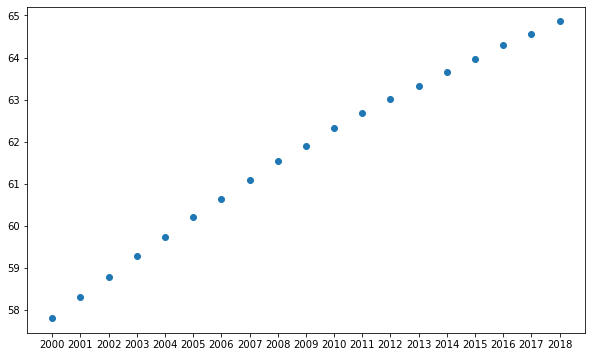

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(mean_year.index,mean_year)
plt.show()

In [17]:
table=pd.DataFrame(mean_year)
table.columns=['Y']

In [19]:
table['X']=range(1,20)
table['XY']=table['Y']*table['X']
table['X^2']=table['X']**2
table=pd.DataFrame(table)

In [20]:
sum=pd.DataFrame(table.sum())
sum.columns=['Sigma']
sum

mean=pd.DataFrame(table.mean())
mean.columns=['Mean']
mean

,Mean
Y,61.680201
X,10.000000
XY,628.560150
X^2,130.000000


In [21]:
table=pd.concat([table,sum.T,mean.T])
table

,Y,X,XY,X^2
2000,57.804762,1.0,57.804762,1.0
2001,58.309524,2.0,116.619048,4.0
2002,58.780952,3.0,176.342857,9.0
2003,59.271429,4.0,237.085714,16.0
2004,59.728571,5.0,298.642857,25.0
2005,60.214286,6.0,361.285714,36.0
2006,60.628571,7.0,424.400000,49.0
2007,61.080952,8.0,488.647619,64.0
2008,61.542857,9.0,553.885714,81.0
2009,61.895238,10.0,618.952381,100.0


In [24]:
numerator=(table['XY'].loc['Sigma']-table['X'].loc['Sigma']*table['Y'].loc['Sigma']/20)
numerator

1.2170927318295715

In [11]:
denominator=table['X^2'].loc['Sigma']-table['X'].loc['Sigma']**2/20
denominator

665.0

In [12]:
b=numerator/denominator
b

1.2170927318295715

In [26]:
def eq_regression(x):
    y=table['Y'].loc['Mean']+b*(x-table['X'].loc['Mean'])
    return(y)

estimated Proportion of population with primary reliance on clean fuels and technology for next 11 years [75.06822055137842, 76.28531328320798, 77.50240601503756, 78.71949874686713, 79.9365914786967, 81.15368421052628, 82.37077694235585, 83.58786967418541, 84.804962406015, 86.02205513784456, 87.23914786967413]


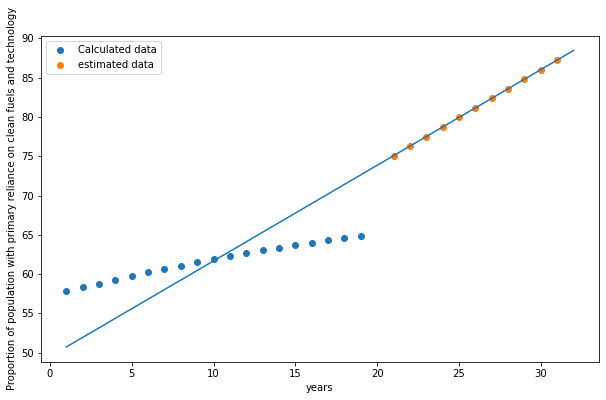

In [32]:
plt.figure(figsize=(10,6))
x=[]
y=[]
for i in range(21,32):
    x.append(i)
    y.append(eq_regression(i))

print("estimated Proportion of population with primary reliance on clean fuels and technology for next 11 years",y)

a=[]
for i in mean_year.index:
    a.append(int(i)-1999)
plt.scatter(a,mean_year,label='Calculated data')
plt.scatter([range(21,32)],y,label='estimated data')
plt.legend()

y_line=[]
x_line=[]
for i in range(1,33):
    x_line.append(i)
    y_line.append(eq_regression(i))
plt.plot(x_line,y_line)
plt.legend()
plt.xlabel("years")
plt.ylabel("Proportion of population with primary reliance on clean fuels and technology")
plt.show()